In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.nn import Linear, Softmax, Sigmoid, Module
from scipy.optimize import minimize
from IPython.display import clear_output
from qiskit import QuantumCircuit
from qiskit_machine_learning.circuit.library import QNNCircuit
from qiskit.circuit import ParameterVector
from qiskit.circuit.library import ZFeatureMap
from qiskit.quantum_info import SparsePauliOp
from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier
from qiskit_machine_learning.neural_networks import SamplerQNN
from qiskit_algorithms.optimizers import COBYLA
from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier
from qiskit_machine_learning.connectors import TorchConnector
import qiskit
import qiskit_machine_learning
print(qiskit.version.get_version_info())
print(qiskit_machine_learning.version.get_version_info())

1.2.4
0.8.0


In [2]:
# Creating/Formatting Data

In [3]:
# Static State Params List
state_params_list = np.zeros((50, 4, 3))
# Hadamard state (pi/2, 0, pi)
state_params_list[0] = np.array([[np.pi/2, 0, np.pi] for _ in range(4)])
# X state (pi, 0, pi) 
state_params_list[1] = np.array([[np.pi, 0, np.pi] for _ in range(4)])
# Y state (pi, 0, np.pi/2)
state_params_list[2] = np.array([[np.pi, 0, np.pi/2] for _ in range(4)])
# Z state (0, 0, 0)
state_params_list[3] = np.array([[0, 0, 0] for _ in range(4)])
# +Y state (pi, 0, -np.pi/2)
state_params_list[4] = np.array([[np.pi, 0, -np.pi/2] for _ in range(4)])
# T state (pi/4, 0, 0)
state_params_list[5] = np.array([[np.pi/4, 0, 0] for _ in range(4)])
# S state (pi/2, 0, 0)
state_params_list[6] = np.array([[np.pi/2, 0, 0] for _ in range(4)])
# Bell state (pi/2, 0, 0) followed by CNOT
state_params_list[7] = np.array([[np.pi/2, 0, 0] for _ in range(4)])
# W state preparation angles
state_params_list[8] = np.array([[2*np.arccos(1/np.sqrt(3)), 0, 0] for _ in range(4)])
# GHZ state preparation angles 
state_params_list[9] = np.array([[np.pi/2, 0, 0] for _ in range(4)])
# Random state 1 (pi/3, pi/6, pi/4)
state_params_list[10] = np.array([[np.pi/3, np.pi/6, np.pi/4] for _ in range(4)])
# Random state 2 (2*pi/3, pi/4, pi/3) 
state_params_list[11] = np.array([[2*np.pi/3, np.pi/4, np.pi/3] for _ in range(4)])
# Random state 3 (pi/6, pi/3, 2*pi/3)
state_params_list[12] = np.array([[np.pi/6, np.pi/3, 2*np.pi/3] for _ in range(4)])
# Random state 4 (3*pi/4, pi/6, pi/2)
state_params_list[13] = np.array([[3*np.pi/4, np.pi/6, np.pi/2] for _ in range(4)])
# Random state 5 (pi/2, pi/4, pi/3)
state_params_list[14] = np.array([[np.pi/2, np.pi/4, np.pi/3] for _ in range(4)])
# Random state 6 (pi/5, pi/3, 3*pi/4)
state_params_list[15] = np.array([[np.pi/5, np.pi/3, 3*np.pi/4] for _ in range(4)])
# Random state 7 (2*pi/5, pi/2, pi/6)
state_params_list[16] = np.array([[2*np.pi/5, np.pi/2, np.pi/6] for _ in range(4)])
# Random state 8 (3*pi/5, 2*pi/3, pi/4)
state_params_list[17] = np.array([[3*np.pi/5, 2*np.pi/3, np.pi/4] for _ in range(4)])
# Random state 9 (4*pi/5, 3*pi/4, pi/3)
state_params_list[18] = np.array([[4*np.pi/5, 3*np.pi/4, np.pi/3] for _ in range(4)])
# Random state 10 (pi/6, 5*pi/6, pi/2)
state_params_list[19] = np.array([[np.pi/6, 5*np.pi/6, np.pi/2] for _ in range(4)])
# Random state 11 (pi/4, pi/3, 2*pi/3)
state_params_list[20] = np.array([[np.pi/4, np.pi/3, 2*np.pi/3] for _ in range(4)])
# Random state 12 (pi/3, pi/2, 3*pi/4)
state_params_list[21] = np.array([[np.pi/3, np.pi/2, 3*np.pi/4] for _ in range(4)])
# Random state 13 (pi/2, 2*pi/3, 5*pi/6)
state_params_list[22] = np.array([[np.pi/2, 2*np.pi/3, 5*np.pi/6] for _ in range(4)])
# Random state 14 (2*pi/3, 3*pi/4, pi)
state_params_list[23] = np.array([[2*np.pi/3, 3*np.pi/4, np.pi] for _ in range(4)])
# Random state 15 (3*pi/4, 5*pi/6, 7*pi/6)
state_params_list[24] = np.array([[3*np.pi/4, 5*np.pi/6, 7*np.pi/6] for _ in range(4)])
# Random state 16 (5*pi/6, pi, 4*pi/3)
state_params_list[25] = np.array([[5*np.pi/6, np.pi, 4*np.pi/3] for _ in range(4)])
# Random state 17 (pi, 7*pi/6, 3*pi/2)
state_params_list[26] = np.array([[np.pi, 7*np.pi/6, 3*np.pi/2] for _ in range(4)])
# Random state 18 (7*pi/6, 4*pi/3, 5*pi/3)
state_params_list[27] = np.array([[7*np.pi/6, 4*np.pi/3, 5*np.pi/3] for _ in range(4)])
# Random state 19 (4*pi/3, 3*pi/2, 11*pi/6)
state_params_list[28] = np.array([[4*np.pi/3, 3*np.pi/2, 11*np.pi/6] for _ in range(4)])
# Random state 20 (3*pi/2, 5*pi/3, 2*pi)
state_params_list[29] = np.array([[3*np.pi/2, 5*np.pi/3, 2*np.pi] for _ in range(4)])
# Random state 21 (5*pi/3, 11*pi/6, 13*pi/6)
state_params_list[30] = np.array([[5*np.pi/3, 11*np.pi/6, 13*np.pi/6] for _ in range(4)])
# Random state 22 (11*pi/6, 2*pi, 7*pi/3)
state_params_list[31] = np.array([[11*np.pi/6, 2*np.pi, 7*np.pi/3] for _ in range(4)])
# Random state 23 (pi/8, pi/5, pi/3)
state_params_list[32] = np.array([[np.pi/8, np.pi/5, np.pi/3] for _ in range(4)])
# Random state 24 (3*pi/8, 2*pi/5, 2*pi/3)
state_params_list[33] = np.array([[3*np.pi/8, 2*np.pi/5, 2*np.pi/3] for _ in range(4)])
# Random state 25 (5*pi/8, 3*pi/5, pi)
state_params_list[34] = np.array([[5*np.pi/8, 3*np.pi/5, np.pi] for _ in range(4)])
# Random state 26 (7*pi/8, 4*pi/5, 4*pi/3)
state_params_list[35] = np.array([[7*np.pi/8, 4*np.pi/5, 4*np.pi/3] for _ in range(4)])
# Random state 27 (pi/12, pi/7, 3*pi/5)
state_params_list[36] = np.array([[np.pi/12, np.pi/7, 3*np.pi/5] for _ in range(4)])
# Random state 28 (5*pi/12, 2*pi/7, 4*pi/5)
state_params_list[37] = np.array([[5*np.pi/12, 2*np.pi/7, 4*np.pi/5] for _ in range(4)])
# Random state 29 (7*pi/12, 3*pi/7, pi)
state_params_list[38] = np.array([[7*np.pi/12, 3*np.pi/7, np.pi] for _ in range(4)])
# Random state 30 (11*pi/12, 4*pi/7, 6*pi/5)
state_params_list[39] = np.array([[11*np.pi/12, 4*np.pi/7, 6*np.pi/5] for _ in range(4)])
# Random state 31 (pi/10, pi/8, 7*pi/6)
state_params_list[40] = np.array([[np.pi/10, np.pi/8, 7*np.pi/6] for _ in range(4)])
# Random state 32 (3*pi/10, 3*pi/8, 4*pi/3)
state_params_list[41] = np.array([[3*np.pi/10, 3*np.pi/8, 4*np.pi/3] for _ in range(4)])
# Random state 33 (7*pi/10, 5*pi/8, 3*pi/2)
state_params_list[42] = np.array([[7*np.pi/10, 5*np.pi/8, 3*np.pi/2] for _ in range(4)])
# Random state 34 (9*pi/10, 7*pi/8, 5*pi/3)
state_params_list[43] = np.array([[9*np.pi/10, 7*np.pi/8, 5*np.pi/3] for _ in range(4)])
# Random state 35 (11*pi/10, 9*pi/8, 11*pi/6)
state_params_list[44] = np.array([[11*np.pi/10, 9*np.pi/8, 11*np.pi/6] for _ in range(4)])
# Random state 36 (13*pi/10, 11*pi/8, 2*pi)
state_params_list[45] = np.array([[13*np.pi/10, 11*np.pi/8, 2*np.pi] for _ in range(4)])
# Random state 37 (3*pi/20, 13*pi/8, 7*pi/4)
state_params_list[46] = np.array([[3*np.pi/20, 13*np.pi/8, 7*np.pi/4] for _ in range(4)])
# Random state 38 (7*pi/20, 15*pi/8, 5*pi/4)
state_params_list[47] = np.array([[7*np.pi/20, 15*np.pi/8, 5*np.pi/4] for _ in range(4)])
# Random state 39 (11*pi/20, pi/9, 3*pi/4)
state_params_list[48] = np.array([[11*np.pi/20, np.pi/9, 3*np.pi/4] for _ in range(4)])
# Random state 40 (19*pi/20, 2*pi/9, pi/4)
state_params_list[49] = np.array([[19*np.pi/20, 2*np.pi/9, np.pi/4] for _ in range(4)])

print(state_params_list)

[[[ 1.57079633  0.          3.14159265]
  [ 1.57079633  0.          3.14159265]
  [ 1.57079633  0.          3.14159265]
  [ 1.57079633  0.          3.14159265]]

 [[ 3.14159265  0.          3.14159265]
  [ 3.14159265  0.          3.14159265]
  [ 3.14159265  0.          3.14159265]
  [ 3.14159265  0.          3.14159265]]

 [[ 3.14159265  0.          1.57079633]
  [ 3.14159265  0.          1.57079633]
  [ 3.14159265  0.          1.57079633]
  [ 3.14159265  0.          1.57079633]]

 [[ 0.          0.          0.        ]
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]]

 [[ 3.14159265  0.         -1.57079633]
  [ 3.14159265  0.         -1.57079633]
  [ 3.14159265  0.         -1.57079633]
  [ 3.14159265  0.         -1.57079633]]

 [[ 0.78539816  0.          0.        ]
  [ 0.78539816  0.          0.        ]
  [ 0.78539816  0.          0.        ]
  [ 0.78539816  0.          0.        ]]

 [[ 1.57079633  0.          

In [4]:
# Loading Variable Weights
import json
def load_four_class_data():
    # Depth files
    location = "/home/himankhanda/projects/QiskitPolygence/QAI Algorithms/NTangled_Datasets-main/NTangled_Datasets-main/Hardware_Efficient/4_Qubits"
    data1 = []
    data2 = []
    data3 = []
    data4 = []
    # Load and process all weights
    for i in range(0,1):
        if i == 0:
            with open(location + f"/Depth_{1}/hwe_4q_ps_5_{1}_weights.txt", 'r') as f1:
                data1.append(json.load(f1))
            with open(location + f"/Depth_{2}/hwe_4q_ps_5_{2}_weights.txt", 'r') as f2:
                data2.append(json.load(f2))
            with open(location + f"/Depth_{3}/hwe_4q_ps_5_{3}_weights.txt", 'r') as f3:
                data3.append(json.load(f3))
            with open(location + f"/Depth_{4}/hwe_4q_ps_5_{4}_weights.txt", 'r') as f4:
                data4.append(json.load(f4))
        else:
            with open(location + f"/Depth_{1}/hwe_4q_ps_{i}5_{1}_weights.txt", 'r') as f1:
                data1.append(json.load(f1))
            with open(location + f"/Depth_{2}/hwe_4q_ps_{i}5_{2}_weights.txt", 'r') as f2:
                data2.append(json.load(f2))
            with open(location + f"/Depth_{3}/hwe_4q_ps_{i}5_{3}_weights.txt", 'r') as f3:
                data3.append(json.load(f3))
            with open(location + f"/Depth_{4}/hwe_4q_ps_{i}5_{4}_weights.txt", 'r') as f4:
                data4.append(json.load(f4))
    
    # Combine all data and pad to max size (4,4,3)
    max_size = (4,4,3)
    padded_data = []
    
    for data in data1 + data2 + data3 + data4:
        # Convert data to numpy array if not already
        data_arr = np.array(data)
        # Pad with zeros if needed
        if data_arr.shape != max_size:
            pad_width = [(0, max_size[i] - data_arr.shape[i]) for i in range(len(max_size))]
            data_arr = np.pad(data_arr, pad_width, mode='constant')
        padded_data.append(data_arr)
    
    x = np.array(padded_data)
    
    # Create labels
    y = np.concatenate([
        np.ones(len(data1), dtype=int),
        np.ones(len(data2), dtype=int) * 2,
        np.ones(len(data3), dtype=int) * 3,
        np.ones(len(data4), dtype=int) * 4
    ])
    
    print(x)
    print(x.shape)
    print(y)
    
    return x, y

In [5]:
wx, wy = load_four_class_data()
print(wx.shape,wy.shape)

[[[[-0.0380492   0.02183672  0.03220569]
   [-0.04109688  0.04458482 -0.01448415]
   [ 0.04275408 -0.04544197 -0.02364965]
   [-0.04332199 -0.04773934 -0.01598744]]

  [[ 0.          0.          0.        ]
   [ 0.          0.          0.        ]
   [ 0.          0.          0.        ]
   [ 0.          0.          0.        ]]

  [[ 0.          0.          0.        ]
   [ 0.          0.          0.        ]
   [ 0.          0.          0.        ]
   [ 0.          0.          0.        ]]

  [[ 0.          0.          0.        ]
   [ 0.          0.          0.        ]
   [ 0.          0.          0.        ]
   [ 0.          0.          0.        ]]]


 [[[ 0.05170398  0.01168392 -0.06009462]
   [ 0.243309    0.45104221  0.47327134]
   [-0.24505161 -0.41597199 -0.27864618]
   [-0.22578102 -0.15001654 -0.08258253]]

  [[ 0.12208327 -0.04903425  0.02521982]
   [ 0.11338364  0.49720278  0.46037073]
   [-0.23163257 -0.28240836 -0.63127422]
   [-0.21903206 -0.00662576 -0.13605921]]

  

In [6]:
# Conditioning Data
x =[]
y = []

for g in range(len(wx)):
    for il in range(len(state_params_list)):
        x.append(np.concatenate([state_params_list[il].flatten(),state_params_list[il].flatten(), wx[g].flatten(), wx[g].flatten()]))
        y.append(wy[g])

xa = np.array(x)
ya = np.array(y)

# Shuffle
indices = np.random.permutation(len(xa))
xa = xa[indices]
ya = ya[indices]

# Reduce labels by 1 (shifting from 1-4 range to 0-3 range)
ya = ya - 1

# Split into train and test sets (80-20 split)
split_idx = int(0.8 * len(x))
x = xa[:split_idx]
y = ya[:split_idx]
x1 = xa[split_idx:]
y1 = ya[split_idx:]

In [7]:
print(x[0])
print(y[0])

print(x[1])
print(y[1])

[ 1.57079633  0.78539816  1.04719755  1.57079633  0.78539816  1.04719755
  1.57079633  0.78539816  1.04719755  1.57079633  0.78539816  1.04719755
  1.57079633  0.78539816  1.04719755  1.57079633  0.78539816  1.04719755
  1.57079633  0.78539816  1.04719755  1.57079633  0.78539816  1.04719755
  0.05170398  0.01168392 -0.06009462  0.243309    0.45104221  0.47327134
 -0.24505161 -0.41597199 -0.27864618 -0.22578102 -0.15001654 -0.08258253
  0.12208327 -0.04903425  0.02521982  0.11338364  0.49720278  0.46037073
 -0.23163257 -0.28240836 -0.63127422 -0.21903206 -0.00662576 -0.13605921
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.05170398  0.01168392 -0.06009462  0.243309    0.45104221  0.47327134
 -0.24505161 -0.41597199 -0.27864618 -0.22578102 -0.15001654 -0.08258253
  0.122083

In [8]:
print(x,y,x1,y1)
print(x.shape,y.shape,x1.shape,y1.shape)

[[ 1.57079633e+00  7.85398163e-01  1.04719755e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.96349541e+00  1.88495559e+00  3.14159265e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.91063324e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 2.98451302e+00  6.98131701e-01  7.85398163e-01 ...  3.49389959e-02
   3.12639663e-03 -9.44239588e-02]
 [ 1.04719755e+00  5.23598776e-01  7.85398163e-01 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 3.14159265e-01  3.92699082e-01  3.66519143e+00 ...  3.49389959e-02
   3.12639663e-03 -9.44239588e-02]] [1 1 1 3 0 0 0 1 2 3 2 0 0 1 2 3 1 3 1 2 3 1 3 3 1 1 0 2 2 2 0 0 3 3 3 3 2
 0 3 3 0 2 3 2 3 3 0 0 3 1 1 3 1 0 1 3 2 1 1 1 3 3 0 2 1 3 2 0 3 1 3 2 1 1
 2 2 1 2 1 2 2 1 0 1 1 3 2 2 1 3 1 1 3 2 3 3 0 2 3 3 1 3 0 0 1 2 1 2 1 0 0
 0 3 2 1 1 2 2 1 0 3 2 0 3 2 1 3 3 2 0 0 0 3 1 0 2 0 1 2 2 2 0 1 0 1 1 0 0
 1 0 3 1 3 2 0 0 2 3 2 3] [[ 2.51327412e+00  2.35619449e+00  1.0

In [9]:
# Creating Circuit

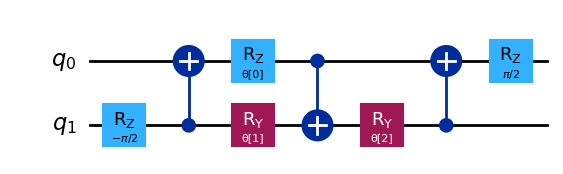

In [10]:
# Two qubit unitary as defined
def conv_circuit(params):
    target = QuantumCircuit(2)
    target.rz(-np.pi / 2, 1)
    target.cx(1, 0)
    target.rz(params[0], 0)
    target.ry(params[1], 1)
    target.cx(0, 1)
    target.ry(params[2], 1)
    target.cx(1, 0)
    target.rz(np.pi / 2, 0)
    return target

# Visual
params = ParameterVector("θ", length=3)
circuit = conv_circuit(params)
circuit.draw("mpl")

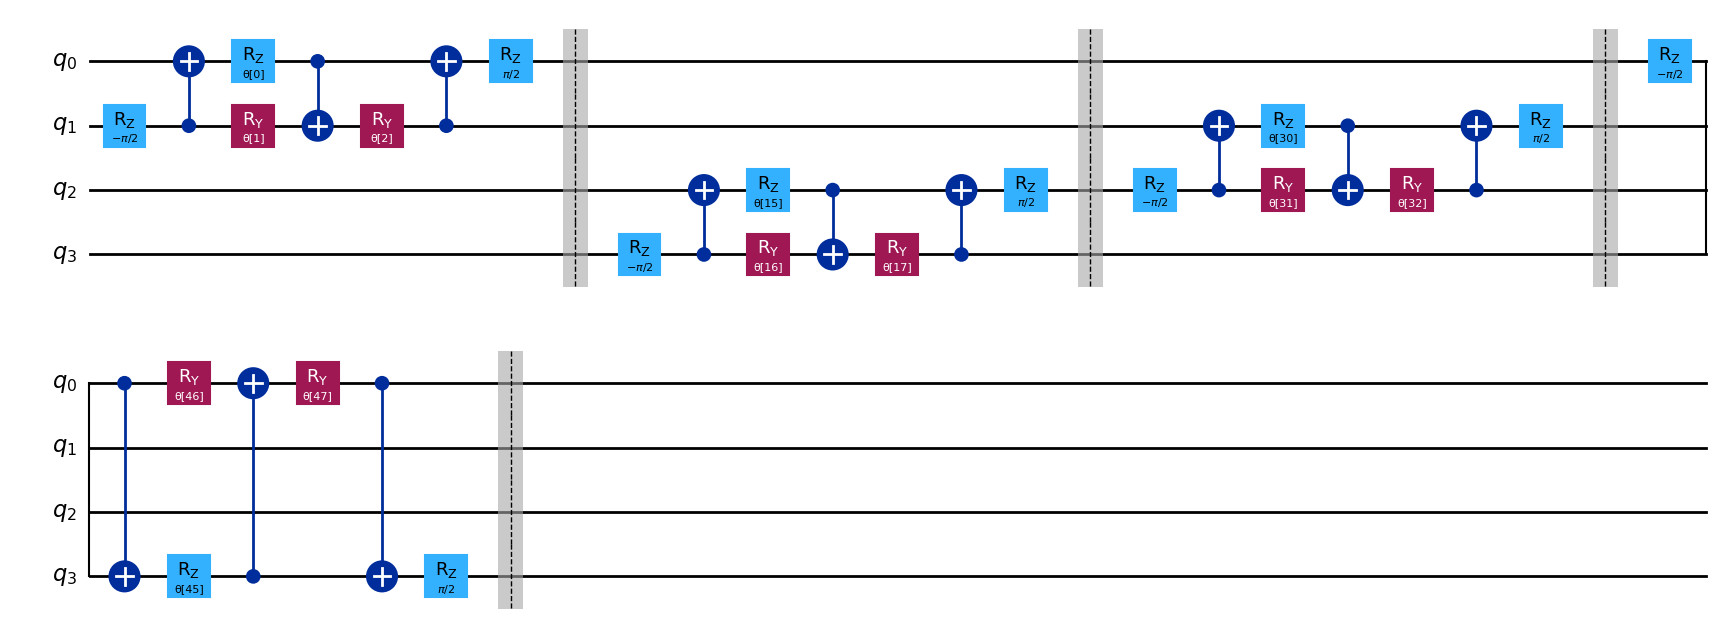

In [11]:
# Create Layer (Repeating Circuit on Neighboring Qubits).
def conv_layer(num_qubits, param_prefix):
    qc = QuantumCircuit(num_qubits, name="Convolutional Layer")
    qubits = list(range(num_qubits))
    param_index = 0
    params = ParameterVector(param_prefix, length=num_qubits * 15)
    for q1, q2 in zip(qubits[0::2], qubits[1::2]):
        qc = qc.compose(conv_circuit(params[param_index : (param_index + 15)]), [q1, q2])
        qc.barrier()
        param_index += 15
    for q1, q2 in zip(qubits[1::2], qubits[2::2] + [0]):
        qc = qc.compose(conv_circuit(params[param_index : (param_index + 15)]), [q1, q2])
        qc.barrier()
        param_index += 15

    qc_inst = qc.to_instruction()

    qc = QuantumCircuit(num_qubits)
    qc.append(qc_inst, qubits)
    return qc

# Visual
circuit = conv_layer(4, "θ")
circuit.decompose().draw("mpl")

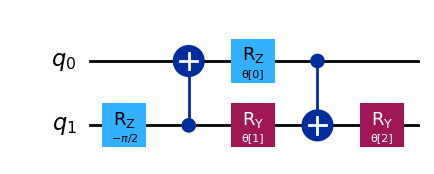

In [12]:
# Defining Pool Circuit
def pool_circuit(params):
    target = QuantumCircuit(2)
    target.rz(-np.pi / 2, 1)
    target.cx(1, 0)
    target.rz(params[0], 0)
    target.ry(params[1], 1)
    target.cx(0, 1)
    target.ry(params[2], 1)

    return target

# Visual
params = ParameterVector("θ", length=3)
circuit = pool_circuit(params)
circuit.draw("mpl")

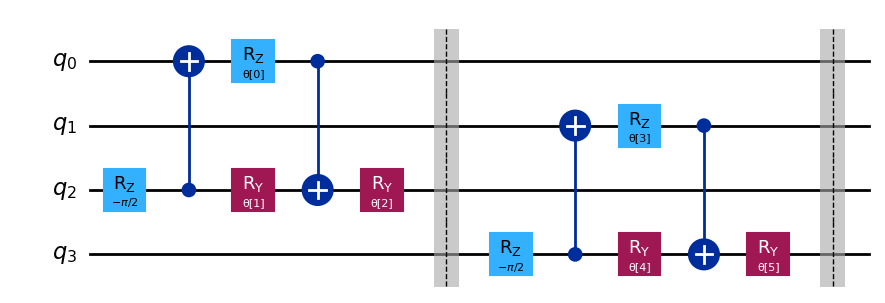

In [13]:
# Defining Pool Layer (Repeating Circuit on Neighboring Qubits)
def pool_layer(sources, sinks, param_prefix):
    num_qubits = len(sources) + len(sinks)
    qc = QuantumCircuit(num_qubits, name="Pooling Layer")
    param_index = 0
    params = ParameterVector(param_prefix, length=num_qubits // 2 * 3)
    for source, sink in zip(sources, sinks):
        qc = qc.compose(pool_circuit(params[param_index : (param_index + 3)]), [source, sink])
        qc.barrier()
        param_index += 3

    qc_inst = qc.to_instruction()

    qc = QuantumCircuit(num_qubits)
    qc.append(qc_inst, range(num_qubits))
    return qc

# Visual
sources = [0, 1]
sinks = [2, 3]
circuit = pool_layer(sources, sinks, "θ")
circuit.decompose().draw("mpl")

In [14]:
def generate_feature_map(num_qubits=8, depth=4, weight=None, state_params=None):

    print("depth:", depth)
    def create_feature_map(num_qubits, depth, weight):
        """
        Creates a Hardware Efficient Ansatz feature map following Algorithm 2
        Args:
            num_qubits (int): Number of qubits (8 for this case)
            depth (int): Circuit depth L
        Returns:
            QuantumCircuit: Feature map circuit
        """
        # Initialize circuit
        feature_map = QuantumCircuit(num_qubits, name="Feature Map")
        
        if (weight is None):
            # Generate random rotation parameters for U3 gates
            # Shape: (depth, num_qubits, 3) for the three rotation angles
            theta = np.random.uniform(0, 2*np.pi, size=(depth, num_qubits, 3))
        else:
            theta = weight[:depth]
            theta = np.concatenate([theta, theta], axis=1)

        # Implement the hardware efficient ansatz
        for d in range(depth):
            # First rotation layer - U3 gates on each qubit
            for i in range(int(num_qubits)):
                feature_map.u(theta[d,i,0], theta[d,i,1], theta[d,i,2], i)
            
            # First entangling layer - CZ gates on even-odd pairs
            for i in range(0, int(num_qubits)-1, 2):
                feature_map.cz(i, i + 1)
            # feature_map.barrier()
            
            # Second rotation layer - U3 gates on each qubit    
            for i in range(int(num_qubits)):
                feature_map.u(theta[d,i,0], theta[d,i,1], theta[d,i,2], i)
            
            # Second entangling layer - CZ gates offset by 1
            for i in range(1, int(num_qubits)-1, 2):
                feature_map.cz(i, i + 1)
            # Connect last qubit to first for circular entanglement
            # if int(num_qubits/2) % 2 == 0:
            #     feature_map.cz(int(num_qubits)-1, 0)
            feature_map.barrier()
        
        return feature_map

    def generate_input_maps(state_params,num_qubits):
        """
        Generates random input states by applying random U3 rotations
        Args:
            num_states (int): Number of input states to generate
            num_qubits (int): Number of qubits in circuit
        Returns:
            list[QuantumCircuit]: List of input state circuits
        """

        if (state_params is None):
            # Generate random angles for each qubit
            # We'll copy the state for qubits 0-3 to qubits 4-7
            state_params = np.random.uniform(0, 2*np.pi, size=(4, 3))

        input_states = []
        for _ in range(state_params.shape[0]):
            
            # Create input state circuit
            input_circuit = QuantumCircuit(num_qubits)
            
            # Apply rotations to first 4 qubits
            for i in range(4):
                input_circuit.u(state_params[i,0], 
                            state_params[i,1], 
                            state_params[i,2], i)
                # Copy same rotations to corresponding qubit in second half
                input_circuit.u(state_params[i,0], 
                            state_params[i,1], 
                            state_params[i,2], i+4)
                
            input_circuit.barrier()
            
            input_states.append(input_circuit)
        
        return input_states

    # Create and visualize the feature map
    initial_feature_map = create_feature_map(num_qubits, depth, weight)
    print("Feature Map Circuit:")
    display(initial_feature_map.draw("mpl"))

    # Generate and visualize sample input states
    input_states = generate_input_maps(state_params,num_qubits)
    print("\nExample Input State Circuit:")
    display(input_states[0].draw("mpl"))

    # Combine feature map with an input state to see complete circuit
    complete_circuit = input_states[0].compose(initial_feature_map)
    print("\nComplete Circuit (Input + Feature Map):")
    display(complete_circuit.draw("mpl"))

    return complete_circuit

depth: 1
Feature Map Circuit:


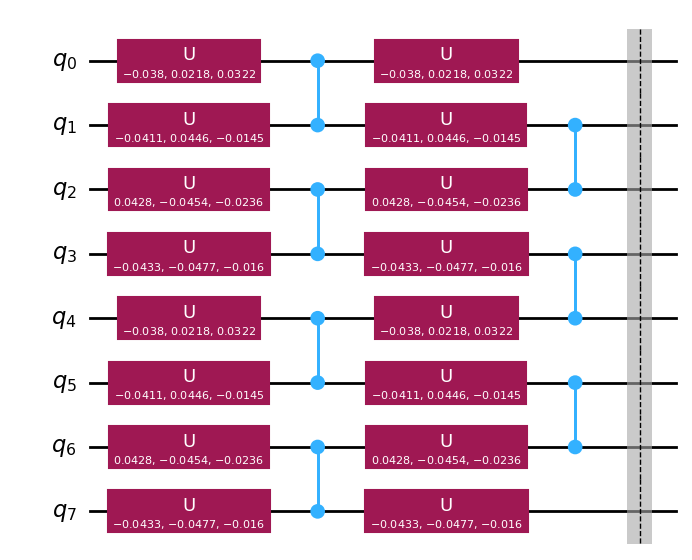


Example Input State Circuit:


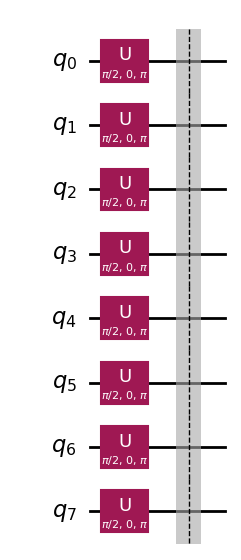


Complete Circuit (Input + Feature Map):


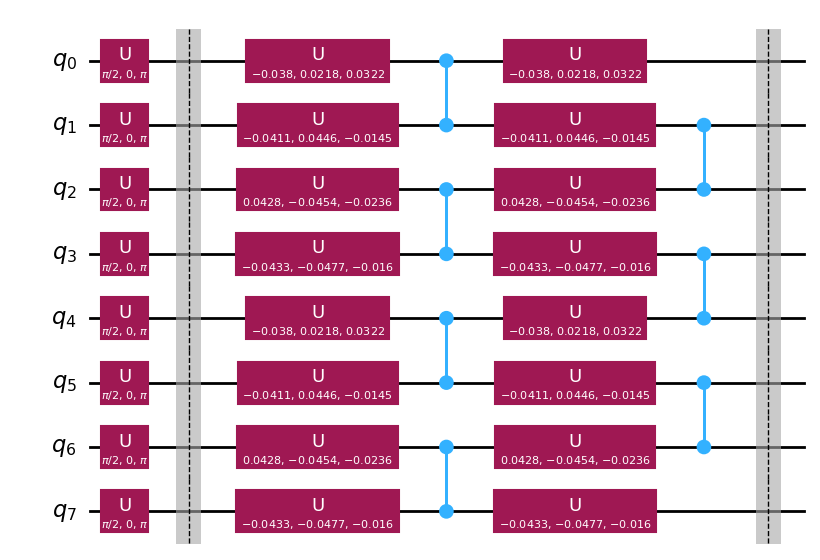

In [15]:
# Sample Generation
circuit.feature_map = generate_feature_map(num_qubits=8, depth=y[0], weight=wx[0], state_params=state_params_list[0])

In [16]:
def generate_feature_map(num_qubits=8, weight=None, depth = 4):
    params = ParameterVector("θ", (num_qubits*3)+(num_qubits*3*4))
    
    state_params = params[:num_qubits*3]
    weight = params[num_qubits*3:]
    
    """
    Creates a Hardware Efficient Ansatz feature map following Algorithm 2 (Combined with Input State)
    Args:
        num_qubits (int): Number of qubits (8 for this case)
        depth (int): Circuit depth L
    Returns:
        QuantumCircuit: Feature map circuit
    """
    # Initialize circuit
    feature_map = QuantumCircuit(num_qubits, name="Feature Map")
    
    if (state_params is None):
        # Generate random angles for each qubit
        # We'll copy the state for qubits 0-3 to qubits 4-7
        state_params = np.random.uniform(0, 2*np.pi, size=(8, 3))
    else:
        # Reshape state parameters into required shape
        state_params = np.array(state_params).reshape(8, 3)
        
        # Apply rotations to first 4 qubits
        for i in range(8):
            feature_map.u(state_params[i,0], 
                        state_params[i,1], 
                        state_params[i,2], i)
            
        feature_map.barrier()
        

    if (weight is None):
        # Generate random rotation parameters for U3 gates
        # Shape: (depth, num_qubits, 3) for the three rotation angles
        theta = np.random.uniform(0, 2*np.pi, size=(depth, num_qubits, 3))
    else:
        # Reshape weight parameters into required shape
        theta = np.array(weight).reshape(depth, num_qubits, 3)

    # Implement the hardware efficient ansatz
    
    for d in range(depth):
        # First rotation layer - U3 gates on each qubit
        for i in range(int(num_qubits)):
            feature_map.u(theta[d,i,0], theta[d,i,1], theta[d,i,2], i)
        
        # First entangling layer - CZ gates on even-odd pairs
        for i in range(0, int(num_qubits)-1, 2):
            feature_map.cz(i, i + 1)
        # feature_map.barrier()
        
        # Second rotation layer - U3 gates on each qubit    
        for i in range(int(num_qubits)):
            feature_map.u(theta[d,i,0], theta[d,i,1], theta[d,i,2], i)
        
        # Second entangling layer - CZ gates offset by 1
        for i in range(1, int(num_qubits)-1, 2):
            feature_map.cz(i, i + 1)
        # Connect last qubit to first for circular entanglement
        # if int(num_qubits/2) % 2 == 0:
        #     feature_map.cz(int(num_qubits)-1, 0)
        feature_map.barrier()

    return feature_map

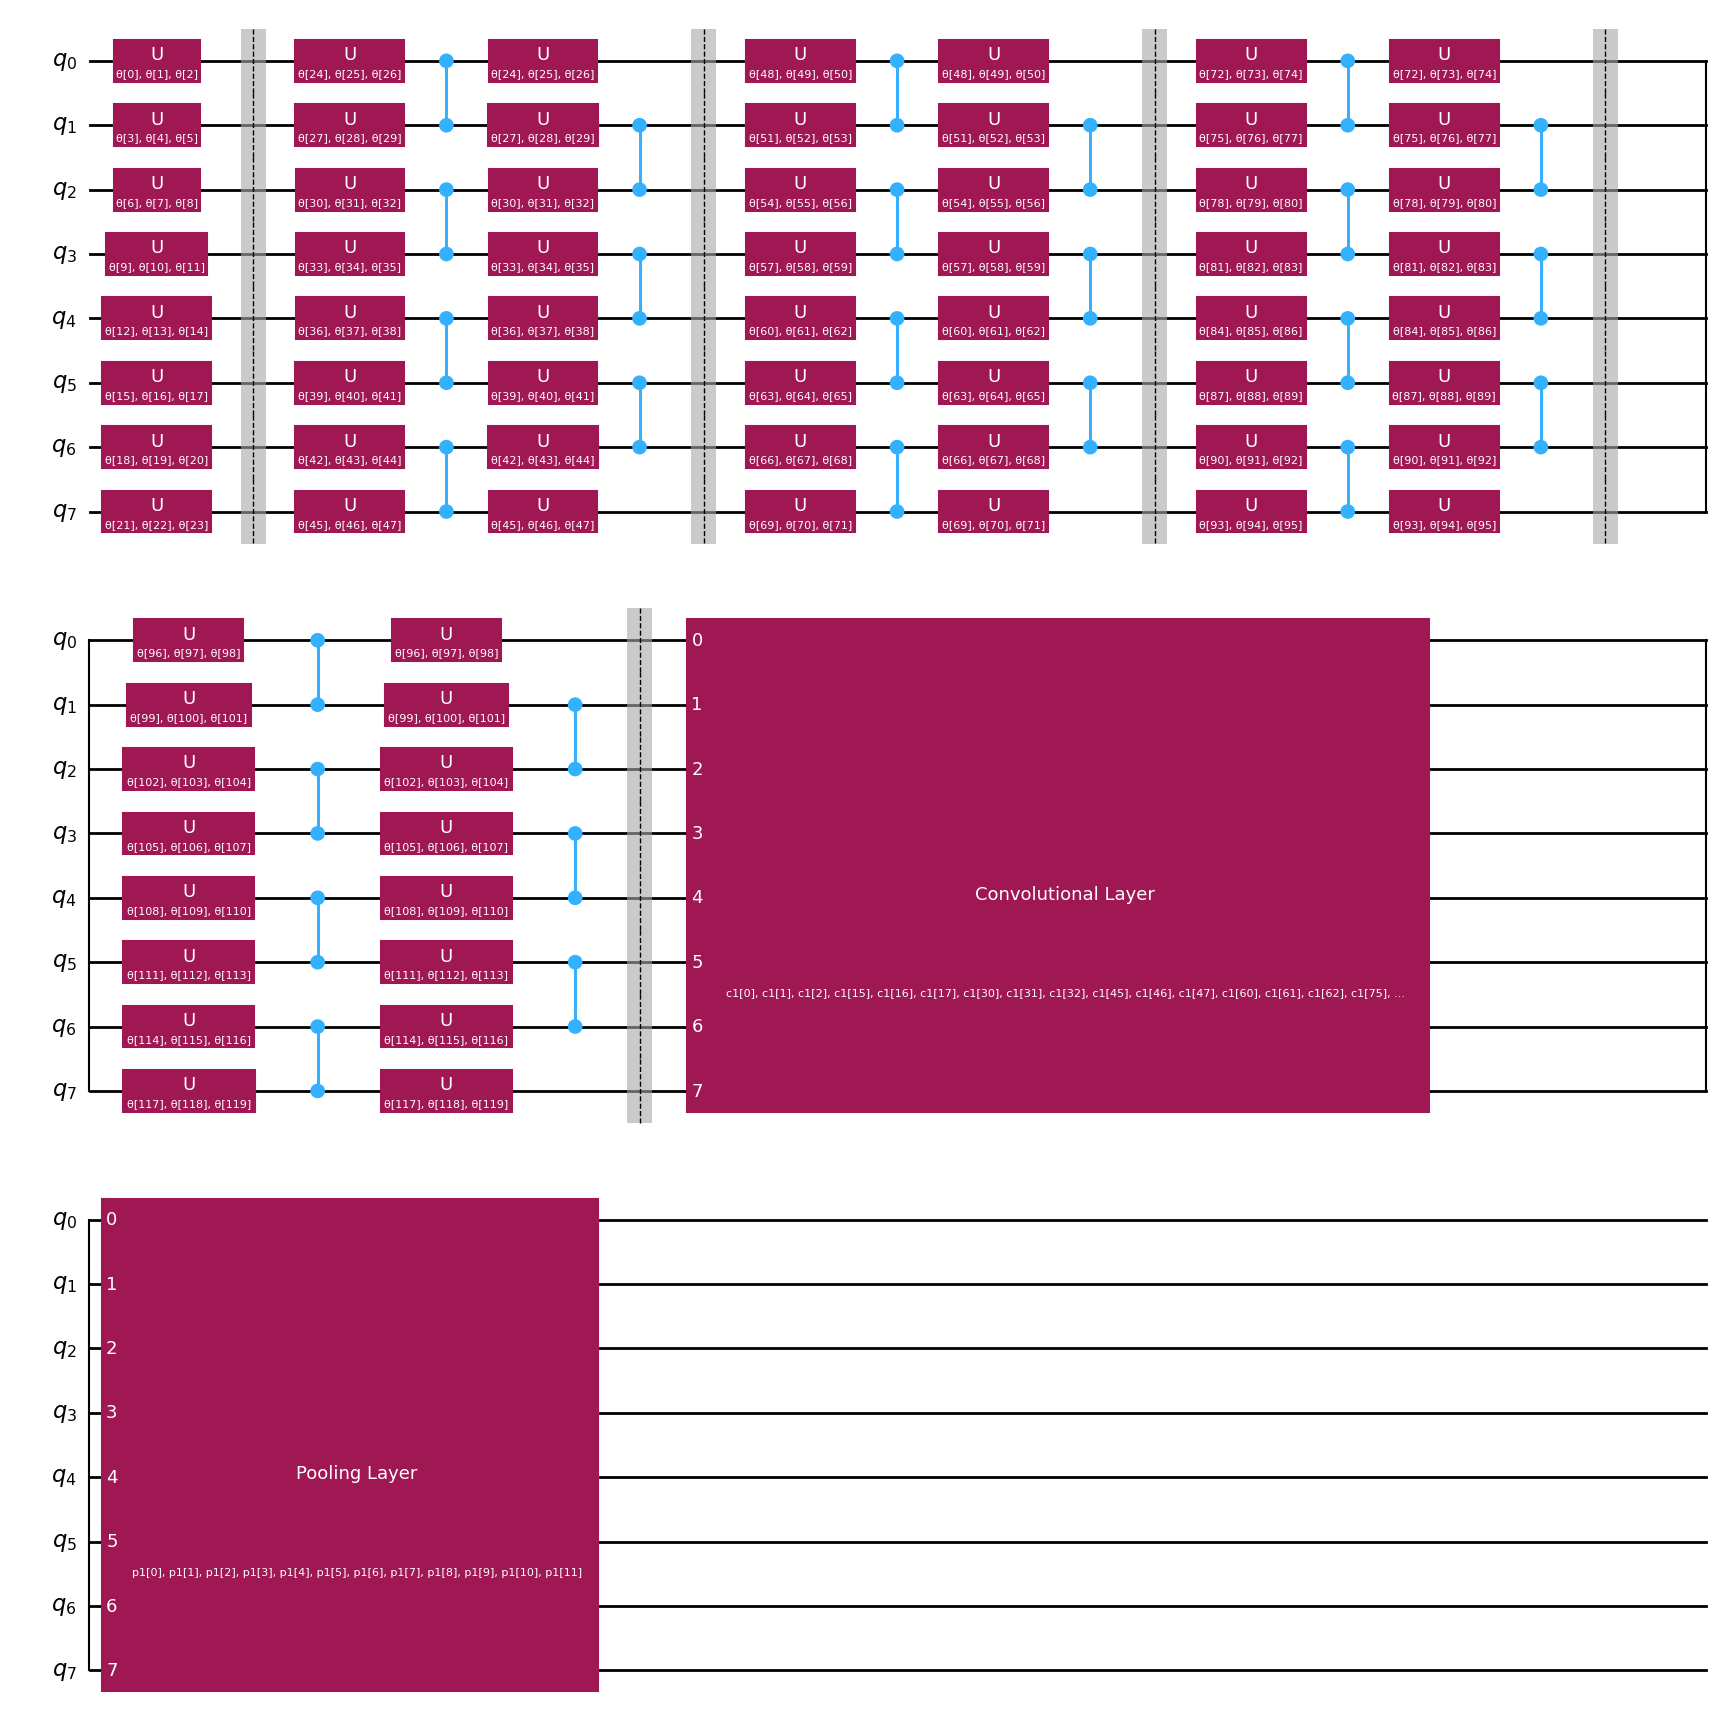

In [17]:
# Ansatz Instantiation Method
from qiskit import ClassicalRegister, QuantumRegister
def create_QCNN():
    q_reg = QuantumRegister(8, "q_reg")
    ansatz = QuantumCircuit(q_reg, name="Ansatz")

    # First Convolutional Layer
    ansatz.compose(conv_layer(8, "с1"), list(range(8)), inplace=True)

    # First Pooling Layer
    ansatz.compose(pool_layer([0, 1, 2, 3], [4, 5, 6, 7], "p1"), list(range(8)), inplace=True)

    # # Second Convolutional Layer
    # ansatz.compose(conv_layer(4, "c2"), list(range(4, 8)), inplace=True)

    # # Second Pooling Layer
    # ansatz.compose(pool_layer([0, 1], [2, 3], "p2"), list(range(4, 8)), inplace=True)

    # # Third Convolutional Layer
    # ansatz.compose(conv_layer(2, "c3"), list(range(6, 8)), inplace=True)

    # Combining the feature map and ansatz
    circuit = QNNCircuit(8)
    circuit.feature_map = generate_feature_map(num_qubits=8)
    circuit.ansatz = ansatz
    return circuit

# Visual
display(create_QCNN().draw("mpl"))

In [18]:
# Tensor for Pytorch
x=x[:128]
x1=x1[:128]
y=y[:128]
y1=y1[:128]
X = torch.tensor(x, dtype=torch.float32).to("cuda")
Y = torch.tensor(y, dtype=torch.long).to("cuda")
X1 = torch.tensor(x1, dtype=torch.float32).to("cuda")
Y1 = torch.tensor(y1, dtype=torch.long).to("cuda")

In [19]:
# One-Hot Encoding for Final Processing
num_classes = 4
Y = (torch.nn.functional.one_hot(Y, num_classes=num_classes).float())
Y1 = (torch.nn.functional.one_hot(Y1, num_classes=num_classes).float())

In [20]:
print(X,Y,X1,Y1)

tensor([[ 1.5708e+00,  7.8540e-01,  1.0472e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [ 1.9635e+00,  1.8850e+00,  3.1416e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [ 1.9106e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        ...,
        [ 3.1416e-01,  3.9270e-01,  3.6652e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [ 4.0841e+00,  4.3197e+00,  6.2832e+00,  ...,  3.4939e-02,
          3.1264e-03, -9.4424e-02],
        [ 2.5133e+00,  2.3562e+00,  1.0472e+00,  ...,  3.4939e-02,
          3.1264e-03, -9.4424e-02]], device='cuda:0') tensor([[0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 0., 1.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.],
        [0., 0., 1., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [0., 

In [21]:
# Training

In [22]:
# Pytorch Circuit Module
import torch.nn as nn
class Model(Module): # Simplified
    def __init__(self, qnn_module):
        super().__init__()
        self.qnn_module = qnn_module
        self.softmax = nn.Softmax(dim=-1)

    def forward(self, x):
        x = self.qnn_module(x)
        x = self.softmax(x)
        return x

In [23]:
from qiskit_aer.primitives import Estimator
from qiskit_machine_learning.neural_networks import EstimatorQNN
from qiskit_machine_learning.utils import algorithm_globals

# Reproducable seeds
num_qubits = 8
algorithm_globals.random_seed = 65
seed = 90

# Creating GPU compatible Estimator primitive
sampler = Estimator()
sampler.set_options(device='GPU')
sampler.set_options(method="statevector")
sampler.set_options(seed = seed)

# Setting observables on 15th and 16th qubits.
observable_z5 = SparsePauliOp.from_sparse_list([("Z", [4], 1)], num_qubits=num_qubits)
observable_z6 = SparsePauliOp.from_sparse_list([("Z", [5], 1)], num_qubits=num_qubits)
observable_z7 = SparsePauliOp.from_sparse_list([("Z", [6], 1)], num_qubits=num_qubits)
observable_z8 = SparsePauliOp.from_sparse_list([("Z", [7], 1)], num_qubits=num_qubits)
observables = [observable_z5, observable_z6, observable_z7, observable_z8]

# Instantiating underlying EstimatorQNN
estimator = EstimatorQNN(
    estimator = sampler,
    circuit = create_QCNN(),
    observables = observables,
    input_gradients = True,
)

# Initial Forward Weights
weights = algorithm_globals.random.random(estimator.num_weights)

# Checking Data Forward Result
estimator.forward(input_data = x1[:30], weights = weights)

/tmp/ipykernel_32871/1858059801.py:24: DeprecationWarning: V1 Primitives are deprecated as of qiskit-machine-learning 0.8.0 and will be removed no sooner than 4 months after the release date. Use V2 primitives for continued compatibility and support.
  estimator = EstimatorQNN(
/tmp/ipykernel_32871/1858059801.py:24: UserWarning: No number of qubits was not specified (None) and was retrieved from `circuit` (8). If `circuit` is transpiled, this may cause unstable behaviour.
  estimator = EstimatorQNN(


array([[ 0.0078125 , -0.26953125, -0.17773438,  0.07226562],
       [ 0.02539062,  0.0234375 , -0.19726562,  0.06640625],
       [-0.01171875,  0.01171875,  0.07226562,  0.06054688],
       [-0.02929688,  0.17382812,  0.00390625, -0.1015625 ],
       [-0.02148438, -0.078125  ,  0.03320312, -0.046875  ],
       [ 0.0703125 , -0.23828125, -0.16015625,  0.20703125],
       [-0.05078125, -0.03515625,  0.01171875, -0.00390625],
       [ 0.67578125, -0.12890625,  0.08398438,  0.2421875 ],
       [ 0.04101562, -0.02148438,  0.046875  , -0.00976562],
       [ 0.11914062, -0.03515625, -0.28320312,  0.14453125],
       [ 0.23828125, -0.12695312, -0.13671875,  0.26757812],
       [ 0.1015625 , -0.2421875 , -0.27539062,  0.0859375 ],
       [-0.2890625 , -0.109375  , -0.1953125 ,  0.359375  ],
       [-0.25585938,  0.18945312, -0.16796875, -0.140625  ],
       [-0.06054688,  0.27734375, -0.1015625 ,  0.34375   ],
       [-0.05664062,  0.00976562, -0.53710938,  0.12304688],
       [ 0.2265625 , -0.

In [24]:
# Wrapping estimator with initial weights under TorchConnecter, itself under Pytorch Module.
model = Model(TorchConnector(estimator, weights))
model.to("cuda")
next(model.parameters()).is_cuda

True

In [25]:
# We want to supply one-hot encoded labels.
from tensorflow.keras.losses import CategoricalCrossentropy
loss_func = CategoricalCrossentropy()

# Callback Helper Functions
def accuracy(output, Y):
    acc = 0
    for ix in range(Y.size(dim=0)):
        val = output[ix]
        if (torch.argmax(val) == torch.argmax(Y[ix])):
            acc+=1
    return ((acc/(Y.size(dim=0)))*100)

def objective_function(weights):
    global X
    global Y
    # if(ix != 1 and ix%333 == 0):
    #     indices = torch.randperm(X.size()[0])
    #     X=X[indices]
    #     Y=Y[indices]
    #     print(X,Y)
    # Referencing Global Variables
    global data
    # Local Variable
    total_loss = 0.0
    # Overiding with new data
    model = Model(TorchConnector(estimator, weights)).to("cuda")
    # Getting Output
    output = model(X)
    output1 = model(X1)
    loss_output = output.detach().cpu().numpy()
    loss_output1 = output1.detach().cpu().numpy()
    loss_Y = Y.detach().cpu().numpy()
    loss_Y1 = Y1.detach().cpu().numpy()
    # Calculate Loss
    loss = loss_func(loss_output, loss_Y).numpy()
    loss1 = loss_func(loss_output1, loss_Y1).numpy()
    # Calculate Accuracy
    acc = accuracy(output, Y)
    # Calculate Test Accuracy
    test_acc = accuracy(output1, Y1)
    # Append Checkpoint Data Points to Tracker
    val = f"Iteration: {ix}; Accuracy: {acc}%; Loss: {loss}; Test Accuracy: {test_acc}%"
    data.append(val)
    total_loss += loss
    loss_list.append(total_loss)
    accuracy_list.append(acc)
    test_accuracy_list.append(test_acc)
    return total_loss

def callback(weights):
    # Iteration Tracking
    global ix
    global weight_list
    # Printing Checkpoint Data Points in Tracker
    print("\n".join(data))
    
    # Create figure with three subplots side by side
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 4))
    
    # Plot accuracy
    ax1.set_title("Accuracy against iteration")
    ax1.set_xlabel("Iteration")
    ax1.set_ylabel("Accuracy (%)")
    ax1.plot(range(len(accuracy_list)), accuracy_list)
    
    # Plot test accuracy
    ax2.set_title("Test Accuracy against iteration")
    ax2.set_xlabel("Iteration") 
    ax2.set_ylabel("Test Accuracy (%)")
    ax2.plot(range(len(test_accuracy_list)), test_accuracy_list)
    
    # Plot loss
    ax3.set_title("Loss value against iteration") 
    ax3.set_xlabel("Iteration")
    ax3.set_ylabel("Loss function value")
    ax3.plot(range(len(loss_list)), loss_list)
    
    plt.tight_layout()
    plt.show()
    
    # Printing Weights
    weight_list.append(weights)
    print(weights)
    # Iteration Counter
    ix+=1
    # Clearing Previous Graph/Weights
    clear_output(wait=True)

2025-02-22 22:49:50.040180: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1740293390.053349   32871 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1740293390.057244   32871 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-22 22:49:50.070333: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [26]:
# Training Function
def fit(test_accuracylist=None, accuracylist=None, weights=None, losslist=None, iter= 1000, fresh_start = False):
    global ix
    global data
    global weight_list
    global loss_list
    global accuracy_list
    global test_accuracy_list
    if(fresh_start):
        loss_list = []
        accuracy_list = []
        test_accuracy_list = []
        data = []
        weight_list = []
        weights = algorithm_globals.random.random(estimator.num_weights)
        ix = 1
    else:
        if 'data' not in globals(): data = []
        else: data = data
        if 'weight_list' not in globals():weight_list = []
        else: weight_list = weight_list
        if 'ix' not in globals() and 'ix' not in locals(): ix = 1
        else: ix = ix
        if losslist is not None: losslist = losslist
        elif (('loss_list' not in globals() and 'loss_list' not in locals()) and losslist == None): loss_list = []
        elif 'loss_list' not in globals() and 'loss_list' not in locals(): loss_list = losslist
        else: loss_list = loss_list
        if accuracylist is not None: accuracylist = accuracylist
        elif (('accuracy_list' not in globals() and 'accuracy_list' not in locals()) and accuracylist == None): accuracy_list = []
        elif 'accuracy_list' not in globals() and 'accuracy_list' not in locals(): accuracy_list = accuracylist
        else: accuracy_list = accuracy_list
        if test_accuracylist is not None: test_accuracylist = test_accuracylist
        elif (('test_accuracy_list' not in globals() and 'test_accuracy_list' not in locals()) and test_accuracylist == None): test_accuracy_list = []
        elif 'test_accuracy_list' not in globals() and 'test_accuracy_list' not in locals(): test_accuracy_list = test_accuracylist
        else: test_accuracy_list = test_accuracy_list
        if weights is not None: weights = weights
        elif (('result' not in locals() and 'result' not in globals())) and weights == None:
            weights = algorithm_globals.random.random(estimator.num_weights)
        elif (len(weight_list)>0):
            weights = weight_list[-1]
        else:
            weights = result[0].x
            loss_list = result[2]
    
    result = minimize(
        fun=objective_function,
        callback = callback,
        x0=weights,
        method='COBYLA',
        options={'maxiter': iter},
    )
    return result, data, loss_list, weight_list, accuracy_list, test_accuracy_list

Iteration: 1; Accuracy: 28.90625%; Loss: 12.178747177124023; Test Accuracy: 17.5%
Iteration: 2; Accuracy: 17.96875%; Loss: 12.228724479675293; Test Accuracy: 22.5%
Iteration: 3; Accuracy: 27.34375%; Loss: 12.153034210205078; Test Accuracy: 22.5%
Iteration: 4; Accuracy: 25.0%; Loss: 12.127504348754883; Test Accuracy: 17.5%
Iteration: 5; Accuracy: 25.78125%; Loss: 12.099416732788086; Test Accuracy: 20.0%
Iteration: 6; Accuracy: 25.0%; Loss: 12.085680961608887; Test Accuracy: 20.0%
Iteration: 7; Accuracy: 24.21875%; Loss: 12.135530471801758; Test Accuracy: 20.0%
Iteration: 8; Accuracy: 21.875%; Loss: 12.134431838989258; Test Accuracy: 22.5%
Iteration: 9; Accuracy: 24.21875%; Loss: 12.15067195892334; Test Accuracy: 17.5%
Iteration: 10; Accuracy: 18.75%; Loss: 12.15814208984375; Test Accuracy: 17.5%
Iteration: 11; Accuracy: 27.34375%; Loss: 12.038716316223145; Test Accuracy: 22.5%
Iteration: 12; Accuracy: 25.0%; Loss: 12.155641555786133; Test Accuracy: 22.5%
Iteration: 13; Accuracy: 29.6875

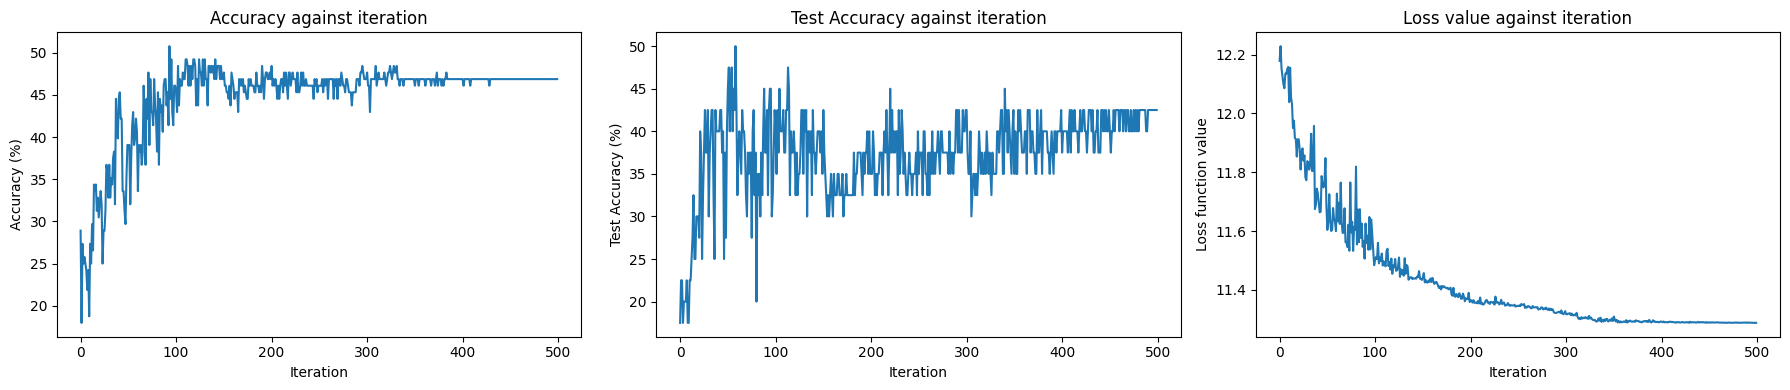

[-0.05959919  1.50894954  1.18124641  0.86428895  1.05016036  0.91968254
  0.31602354  0.20883231  0.13241495  1.81250739 -0.21733519  0.92393789
  1.49551765  1.68889013  0.0982861   1.14509117  0.56075481  1.74521568
 -0.09649525 -0.53641515  1.21455315  1.10164887 -0.34775449  0.50560165
  0.10590707  0.18716517  1.18607875  2.67528728 -0.04683732 -0.07514794
 -0.73559269  0.49770657  0.59977061  0.37580843  1.21550793 -0.65224979]


In [27]:
# Call Training Function and Save as Result
result = fit(iter=500, fresh_start=True)

In [28]:
savemodel = Model(TorchConnector(estimator, result[0].x))
print(next(model.parameters()).is_cuda)
torch.save(savemodel, "4Qubits(One_Hot)")

True


In [29]:
evalmodel = torch.load("4Qubits(One_Hot)", weights_only=False).to("cuda")
evalmodel.eval()
output0 = evalmodel(X)
output1 = evalmodel(X1)
print(f"Train Accuracy: {accuracy(output0, Y)}%")
print(f"Test Accuracy: {accuracy(output1, Y1)}%")

Train Accuracy: 46.875%
Test Accuracy: 42.5%


In [30]:
def translate(array):
    arr = []
    for e in array:
        arr.append(torch.argmax(e))
    return arr
print(f"output 0: {translate(output0)}, \n Y:       {translate(Y)}, \n output 1: {translate(output1)}, \n Y1:       {translate(Y1)}")

output 0: [tensor(1, device='cuda:0'), tensor(3, device='cuda:0'), tensor(3, device='cuda:0'), tensor(3, device='cuda:0'), tensor(0, device='cuda:0'), tensor(2, device='cuda:0'), tensor(0, device='cuda:0'), tensor(3, device='cuda:0'), tensor(3, device='cuda:0'), tensor(0, device='cuda:0'), tensor(2, device='cuda:0'), tensor(0, device='cuda:0'), tensor(0, device='cuda:0'), tensor(1, device='cuda:0'), tensor(3, device='cuda:0'), tensor(3, device='cuda:0'), tensor(1, device='cuda:0'), tensor(3, device='cuda:0'), tensor(3, device='cuda:0'), tensor(2, device='cuda:0'), tensor(0, device='cuda:0'), tensor(2, device='cuda:0'), tensor(0, device='cuda:0'), tensor(3, device='cuda:0'), tensor(3, device='cuda:0'), tensor(1, device='cuda:0'), tensor(3, device='cuda:0'), tensor(2, device='cuda:0'), tensor(2, device='cuda:0'), tensor(2, device='cuda:0'), tensor(3, device='cuda:0'), tensor(2, device='cuda:0'), tensor(0, device='cuda:0'), tensor(0, device='cuda:0'), tensor(3, device='cuda:0'), tensor(2,

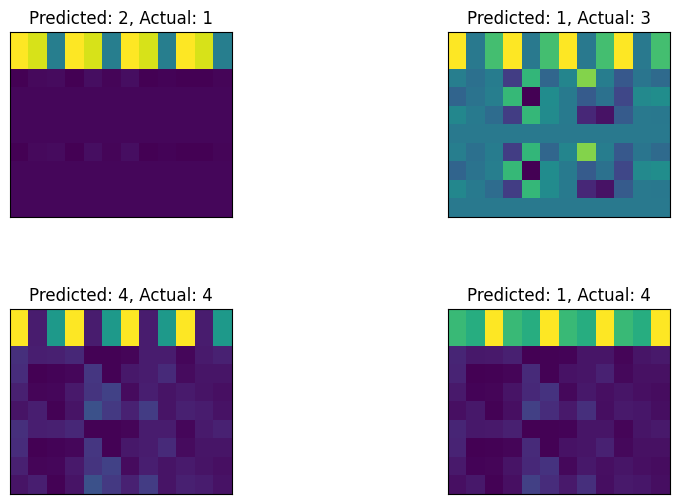

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(10, 6), subplot_kw={"xticks": [], "yticks": []})
for ix in range(0, 4):
    depth = X1.detach().cpu().numpy()[ix]
    predicted = torch.argmax(output1[ix]).item() + 1  # Add 1 to get range 1-4
    actual = torch.argmax(Y1[ix]).item() + 1  # Add 1 to get range 1-4
    
    # Reshape depth array into a 2D image
    depth_img = depth.reshape(int(np.sqrt(len(depth))), -1)
    
    # Display as image instead of line plot
    im = ax[ix // 2, ix % 2].imshow(depth_img, cmap='viridis')
    ax[ix // 2, ix % 2].set_title(f"Predicted: {predicted}, Actual: {actual}")

plt.subplots_adjust(wspace=0.3, hspace=0.5)

In [32]:
print(result)

( message: Maximum number of function evaluations has been exceeded.
 success: False
  status: 2
     fun: 11.287900924682617
       x: [-5.960e-02  1.509e+00 ...  1.216e+00 -6.522e-01]
    nfev: 500
   maxcv: 0.0, ['Iteration: 1; Accuracy: 28.90625%; Loss: 12.178747177124023; Test Accuracy: 17.5%', 'Iteration: 2; Accuracy: 17.96875%; Loss: 12.228724479675293; Test Accuracy: 22.5%', 'Iteration: 3; Accuracy: 27.34375%; Loss: 12.153034210205078; Test Accuracy: 22.5%', 'Iteration: 4; Accuracy: 25.0%; Loss: 12.127504348754883; Test Accuracy: 17.5%', 'Iteration: 5; Accuracy: 25.78125%; Loss: 12.099416732788086; Test Accuracy: 20.0%', 'Iteration: 6; Accuracy: 25.0%; Loss: 12.085680961608887; Test Accuracy: 20.0%', 'Iteration: 7; Accuracy: 24.21875%; Loss: 12.135530471801758; Test Accuracy: 20.0%', 'Iteration: 8; Accuracy: 21.875%; Loss: 12.134431838989258; Test Accuracy: 22.5%', 'Iteration: 9; Accuracy: 24.21875%; Loss: 12.15067195892334; Test Accuracy: 17.5%', 'Iteration: 10; Accuracy: 18.7

In [33]:
# Iteration Value Display Error (Skips back to 3)
result[1]

['Iteration: 1; Accuracy: 28.90625%; Loss: 12.178747177124023; Test Accuracy: 17.5%',
 'Iteration: 2; Accuracy: 17.96875%; Loss: 12.228724479675293; Test Accuracy: 22.5%',
 'Iteration: 3; Accuracy: 27.34375%; Loss: 12.153034210205078; Test Accuracy: 22.5%',
 'Iteration: 4; Accuracy: 25.0%; Loss: 12.127504348754883; Test Accuracy: 17.5%',
 'Iteration: 5; Accuracy: 25.78125%; Loss: 12.099416732788086; Test Accuracy: 20.0%',
 'Iteration: 6; Accuracy: 25.0%; Loss: 12.085680961608887; Test Accuracy: 20.0%',
 'Iteration: 7; Accuracy: 24.21875%; Loss: 12.135530471801758; Test Accuracy: 20.0%',
 'Iteration: 8; Accuracy: 21.875%; Loss: 12.134431838989258; Test Accuracy: 22.5%',
 'Iteration: 9; Accuracy: 24.21875%; Loss: 12.15067195892334; Test Accuracy: 17.5%',
 'Iteration: 10; Accuracy: 18.75%; Loss: 12.15814208984375; Test Accuracy: 17.5%',
 'Iteration: 11; Accuracy: 27.34375%; Loss: 12.038716316223145; Test Accuracy: 22.5%',
 'Iteration: 12; Accuracy: 25.0%; Loss: 12.155641555786133; Test Ac